In [95]:
###   KATHERYN HRABIK
###   CSC 578 - 710 (ONLINE)
###   HOMEWORK #3
###   ***KAGGLE USERNAME: KHRABIK1 (Display Name Katheryn Hrabik)***

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# First install CIFAR10 from Keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

(x_training, y_training), (x_test, y_test) = cifar10.load_data()

In [96]:
# Then split 'training' into two subsets: train and validation.
# After that, we have 3 subsets: train, validation and test.
from sklearn.model_selection import train_test_split

# 80% train, 20% validation, and by stratefied sampling.  
x_train, x_valid, y_train, y_valid = train_test_split(x_training, y_training,
                                                      stratify=y_training, 
                                                      test_size=0.2)
##y's scalar, binarized below

In [97]:
# Obtain the one-hot-vector representation of target (y).
num_classes = 10
## bin meaning binary
y_train_bin = keras.utils.to_categorical(y_train, num_classes)
y_valid_bin = keras.utils.to_categorical(y_valid, num_classes)
y_test_bin = keras.utils.to_categorical(y_test, num_classes)
## After this, Scale the values to 0 to 1. (Divide by 255 - fashion MNIST)
## Show *one* image.

In [98]:
##Scaling all x values from 0 to 1
x_test = x_test/255.0
x_train = x_train/255.0
x_valid = x_valid/255.0

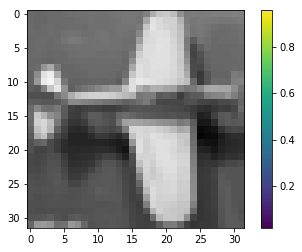

In [99]:
##Show one image from the training set
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

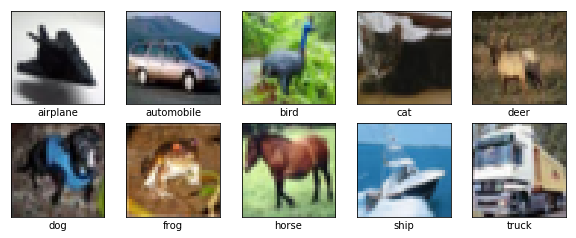

In [100]:
##Showing one image from each class
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(len(class_names)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) 
    ind = np.where(y_training[:]==i)[0][0]
    plt.imshow(x_training[ind], cmap=plt.cm.binary)
    plt.xlabel(class_names[i])
    

In [105]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [106]:
##Compile model using categorical_crossentropy, adam optimizer, 
##and accuracy metric.

sgd = SGD(lr = 0.03, decay = 0.0, momentum = 0.09, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [107]:
model.fit(x_train, y_train_bin, batch_size=32, epochs=30, validation_data =(x_valid, y_valid_bin))

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 75s 2ms/step - loss: 2.0508 - acc: 0.2400 - val_loss: 1.7780 - val_acc: 0.3727
Epoch 2/30
40000/40000 [==============================] - 74s 2ms/step - loss: 1.7262 - acc: 0.3699 - val_loss: 1.5422 - val_acc: 0.4390
Epoch 3/30
40000/40000 [==============================] - 72s 2ms/step - loss: 1.5545 - acc: 0.4321 - val_loss: 1.4120 - val_acc: 0.4837
Epoch 4/30
40000/40000 [==============================] - 72s 2ms/step - loss: 1.4433 - acc: 0.4760 - val_loss: 1.3194 - val_acc: 0.5208
Epoch 5/30
40000/40000 [==============================] - 71s 2ms/step - loss: 1.3696 - acc: 0.5062 - val_loss: 1.3093 - val_acc: 0.5409
Epoch 6/30
40000/40000 [==============================] - 73s 2ms/step - loss: 1.3008 - acc: 0.5343 - val_loss: 1.2077 - val_acc: 0.5716
Epoch 7/30
40000/40000 [==============================] - 72s 2ms/step - loss: 1.2426 - acc: 0.5532 - val_loss: 1.1382 - val_acc

In [108]:
predictions = model.predict(x_test)

In [109]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 5, 5, 64)          0         
__________

In [85]:
import pandas as pd
pred = model.predict(x_test, verbose=1)
predDF = pd.DataFrame(pred)
predDF = predDF.reset_index()
predDF.columns = ('id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9')
predDF['id'] = predDF['id']+1
predDF.to_csv('HRABIK_Submission_5.csv', index=False)

10000/10000 [==============================] - 6s 559us/step
